In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shttp://localhost:8888/treeklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
df = pd.read_csv("Iris.csv")

In [5]:
df = df.drop(columns=["Id"], errors="ignore")

In [ ]:
print("First 5 rows of dataset:")
print(df.head())

In [23]:
print("Dataset Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Missing Values:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [24]:

print("Statistical Summary:")
print(df.describe())

Statistical Summary:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


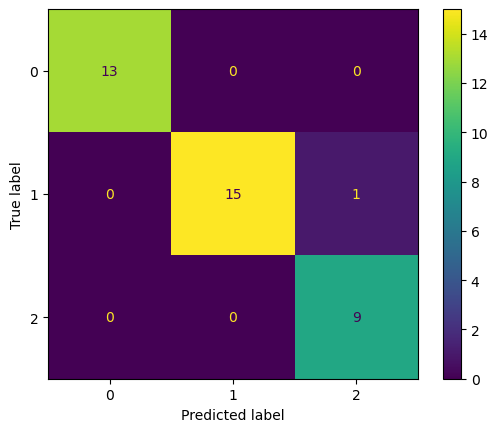

In [25]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

predicted=neigh.predict(X_test)
print(confusion_matrix(y_test, predicted))
cm=confusion_matrix(y_test, predicted)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show() 

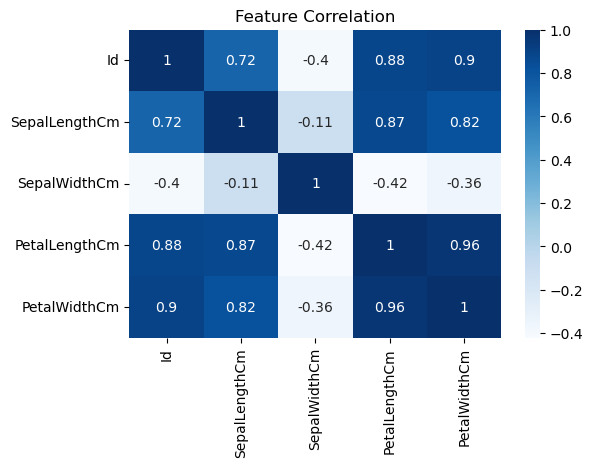

In [26]:
plt.figure(figsize=(6,4))
sns.heatmap(df.drop(columns=["Species"]).corr(), annot=True, cmap="Blues")
plt.title("Feature Correlation")
plt.show()

In [10]:
X = df.drop("Species", axis=1)   
y = df["Species"]               
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [29]:
y_pred = model.predict(X_test)
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [30]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Model Accuracy:", acc)
print("Confusion Matrix:", cm)
print("Classification Report:", classification_report(y_test, y_pred, target_names=encoder.classes_))

Model Accuracy: 1.0
Confusion Matrix: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

